In [1]:
# bcMax
# Results (99%) (95%) (log-normal fit)
# DS0: 826, 731
# DS1: 642, 568
# DS2: none
# DS3: 658, 582
# DS4: 578, 515
# DS5: 770, 667

# noiseWeight
# DS0: raw 99: 0.782  95: 0.688  01: 0.324  05: 0.370
#      (wbc 99: 0.782  95: 0.688  01: 0.342  05: 0.374)
# DS1: raw 99: 0.956  95: 0.874  01: 0.300  05: 0.414
# DS2: none yet
# DS3: raw 99: 0.938  95: 0.852  01: 0.280  05: 0.422
# DS4: raw 99: 0.988  95: 0.916  01: 0.370  05: 0.480
# DS5: raw 99: 0.914  95: 0.826  01: 0.308  05: 0.376

# pol2
# DS0: raw 99: 1.16e-06  95: 9.72e-07  01: -4.55e-06  05: -8.28e-07
# DS1: raw 99: 1.09e-06  95: 9.12e-07  01: -4.73e-06  05: -9.36e-07
# DS2: none yet
# DS3: raw 99: 1.14e-06  95: 9.60e-07  01: -4.37e-06  05: -8.88e-07
# DS4: raw 99: 9.48e-07  95: 7.08e-07  01: -4.46e-06  05: -1.06e-06
# DS5: raw 99: 1.28e-06  95: 1.02e-06  01: -5.29e-06  05: -1.06e-06

# pol3
# DS0: raw 99: 5.74e-11  95: 1.40e-11  01: -2.38e-11  05: -1.88e-11
# DS1: raw 99: 5.76e-11  95: 1.58e-11  01: -2.24e-11  05: -1.76e-11
# DS2: none yet
# DS3: raw 99: 5.56e-11  95: 1.62e-11  01: -2.34e-11  05: -1.86e-11
# DS4: raw 99: 5.84e-11  95: 2.00e-11  01: -1.96e-11  05: -1.36e-11
# DS5: raw 99: 6.02e-11  95: 1.74e-11  01: -2.74e-11  05: -2.00e-11

# Raw results (which gives the best reduction in which DS?)
# DS0: raw 2305421  bcMax 1862514 (0.81)  noiseWeight 1713347 (0.74)  pol2 2128426 (0.92)  pol3 2123633 (0.92)
# DS1: raw 42039  bcMax 37654 (0.90)  noiseWeight 21983 (0.52)  pol2 29367 (0.70)  pol3 28835 (0.69)
# DS2: none yet
# DS3: raw 2081200  bcMax 1612826 (0.77)  noiseWeight 692444 (0.33)  pol2 2055909 (0.99)  pol3 2054380 (0.99)
# DS4: raw 753553  bcMax 695941 (0.92)  noiseWeight 149562 (0.20)  pol2 654206 (0.87)  pol3 652343 (0.87) 
# DS5: raw 42408424  bcMax 27547135 (0.65)  noiseWeight 7204942 (0.17)  pol2 41390014 (0.98)  pol3 41120985 (0.97)

# looks like noiseWeight is the winner.
# Order -- noiseWeight, bcMax, pol2+pol3

import ROOT
ROOT.gROOT.ProcessLine(".x ~/env/MJDClintPlotStyle.C")

dsBcMax = [826,642,0,658,578,770]
dsNoiseWt = [(0.324,0.782),(0.3,0.956),(0,0),(0.280,0.938),(0.370,0.988),(0.308,0.914)]
dsPol2 = [(-4.55e-6,1.16e-6),(-4.73e-6,1.09e-6),(0,0),(-4.37e-6,1.14e-6),(-4.46e-6,0.948e-6),(-5.29e-6,1.28e-6)]
dsPol3 = [(-2.38e-11,5.74e-11),(-2.24e-11,5.76e-11),(0,0),(-2.34e-11,5.56e-11),(-1.96e-11,5.84e-11),(-2.74e-11,6.02e-11)]

def H1D(tree,nameStr,bins,xlo,xhi,drawStr,cutStr):
    h1 = ROOT.TH1D(nameStr,nameStr,bins,xlo,xhi)
    tree.Project(nameStr,drawStr,cutStr)
    return h1

Welcome to JupyROOT 6.08/04


raw 2305421  bcMax 1862514 (0.81)  noiseWeight 1713347 (0.74)  pol2 2128426 (0.92)  pol3 2123633 (0.92)


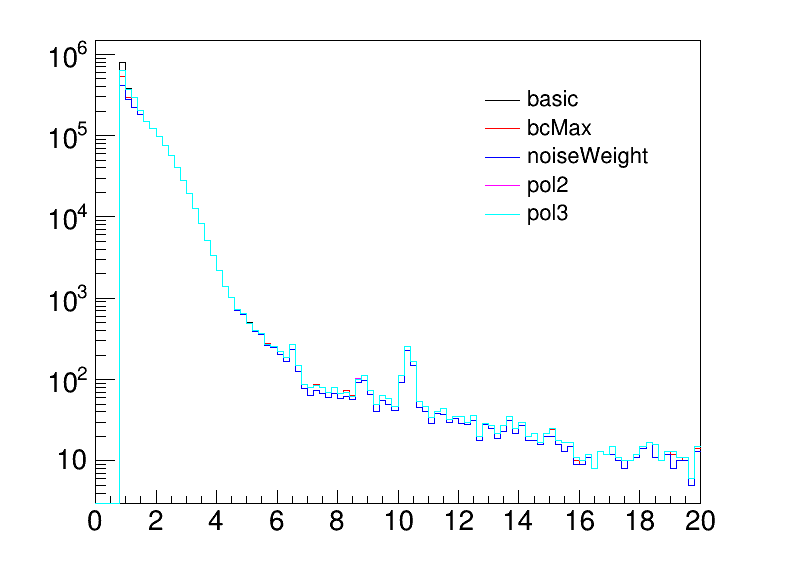

In [2]:
ds = 0
f1 = ROOT.TFile("~/project/lat/latSkimDS%d_0_0.root"%ds)
theCut = f1.Get("theCut").GetTitle()

bkg = ROOT.TChain("skimTree")
bkg.Add("~/project/lat/latSkimDS%d*.root"%ds)

c = ROOT.TCanvas("c","c",800,600)
ROOT.gPad.SetLogy(1)
bins,lower,upper = 100,0,20

# raw
h0 = H1D(bkg,"h0",bins,lower,upper,"trapENFCal",theCut)
h0cts = h0.Integral()

# bcMax
thisCut = theCut + " && bcMax < %d" % dsBcMax[ds]
h1 = H1D(bkg,"h1",bins,lower,upper,"trapENFCal",thisCut)
h1cts = h1.Integral()

# noiseWeight
thisCut = theCut + " && (waveS4-waveS1)/bcMax/trapENFCal > %.2f && (waveS4-waveS1)/bcMax/trapENFCal < %.2f" % (dsNoiseWt[ds][0],dsNoiseWt[ds][1])
h2 = H1D(bkg,"h2",bins,lower,upper,"trapENFCal",thisCut)
h2cts = h2.Integral()

# pol2
thisCut = theCut + " && pol2 > %.3e && pol2 < %.3e" % (dsPol2[ds][0],dsPol2[ds][1])
h3 = H1D(bkg,"h3",bins,lower,upper,"trapENFCal",thisCut)
h3cts = h3.Integral()

# pol3
thisCut = theCut + " && pol3 > %.3e && pol3 < %.3e" % (dsPol3[ds][0],dsPol3[ds][1])
h4 = H1D(bkg,"h4",bins,lower,upper,"trapENFCal",thisCut)
h4cts = h4.Integral()

print "raw %d  bcMax %d (%.2f)  noiseWeight %d (%.2f)  pol2 %d (%.2f)  pol3 %d (%.2f)" % (h0cts,h1cts,h1cts/h0cts,h2cts,h2cts/h0cts,h3cts,h3cts/h0cts,h4cts,h4cts/h0cts)


# -- Plot --
h0.SetLineColor(ROOT.kBlack)
h1.SetLineColor(ROOT.kRed)
h2.SetLineColor(ROOT.kBlue)
h3.SetLineColor(ROOT.kMagenta)
h4.SetLineColor(ROOT.kCyan)

h0.Draw("hist")
h1.Draw("hist same")
h2.Draw("hist same")
h3.Draw("hist same")
h4.Draw("hist same")

l1 = ROOT.TLegend(0.6,0.6,0.85,0.85)
l1.AddEntry(h0,"basic","l")
l1.AddEntry(h1,"bcMax","l")
l1.AddEntry(h2,"noiseWeight","l")
l1.AddEntry(h3,"pol2","l")
l1.AddEntry(h4,"pol3","l")
l1.Draw("same")

c.Draw()

raw 42039  bcMax 37654 (0.90)  noiseWeight 21983 (0.52)  pol2 29367 (0.70)  pol3 28835 (0.69)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


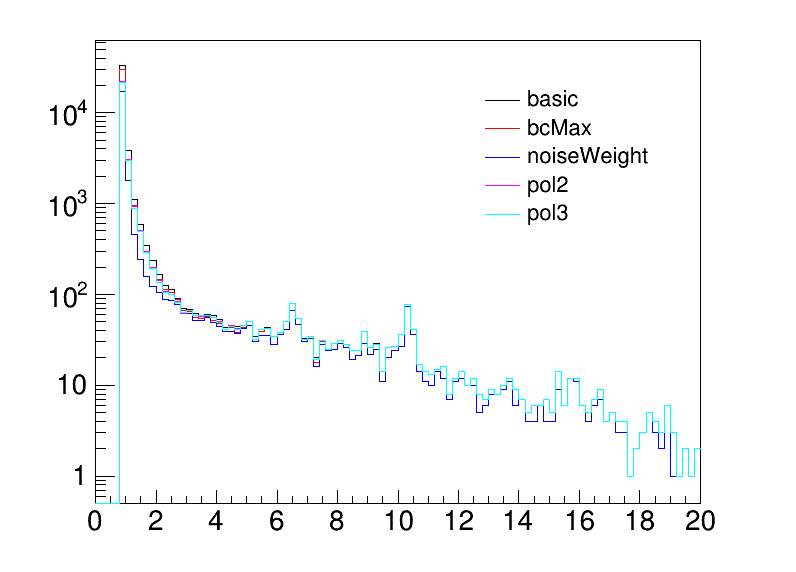

In [3]:
ds = 1
f1 = ROOT.TFile("~/project/lat/latSkimDS%d_0_0.root"%ds)
theCut = f1.Get("theCut").GetTitle()

bkg = ROOT.TChain("skimTree")
bkg.Add("~/project/lat/latSkimDS%d*.root"%ds)

c = ROOT.TCanvas("c","c",800,600)
ROOT.gPad.SetLogy(1)
bins,lower,upper = 100,0,20

# raw
h0 = H1D(bkg,"h0",bins,lower,upper,"trapENFCal",theCut)
h0cts = h0.Integral()

# bcMax
thisCut = theCut + " && bcMax < %d" % dsBcMax[ds]
h1 = H1D(bkg,"h1",bins,lower,upper,"trapENFCal",thisCut)
h1cts = h1.Integral()

# noiseWeight
thisCut = theCut + " && (waveS4-waveS1)/bcMax/trapENFCal > %.2f && (waveS4-waveS1)/bcMax/trapENFCal < %.2f" % (dsNoiseWt[ds][0],dsNoiseWt[ds][1])
h2 = H1D(bkg,"h2",bins,lower,upper,"trapENFCal",thisCut)
h2cts = h2.Integral()

# pol2
thisCut = theCut + " && pol2 > %.3e && pol2 < %.3e" % (dsPol2[ds][0],dsPol2[ds][1])
h3 = H1D(bkg,"h3",bins,lower,upper,"trapENFCal",thisCut)
h3cts = h3.Integral()

# pol3
thisCut = theCut + " && pol3 > %.3e && pol3 < %.3e" % (dsPol3[ds][0],dsPol3[ds][1])
h4 = H1D(bkg,"h4",bins,lower,upper,"trapENFCal",thisCut)
h4cts = h4.Integral()

print "raw %d  bcMax %d (%.2f)  noiseWeight %d (%.2f)  pol2 %d (%.2f)  pol3 %d (%.2f)" % (h0cts,h1cts,h1cts/h0cts,h2cts,h2cts/h0cts,h3cts,h3cts/h0cts,h4cts,h4cts/h0cts)


# -- Plot --
h0.SetLineColor(ROOT.kBlack)
h1.SetLineColor(ROOT.kRed)
h2.SetLineColor(ROOT.kBlue)
h3.SetLineColor(ROOT.kMagenta)
h4.SetLineColor(ROOT.kCyan)

h0.Draw("hist")
h1.Draw("hist same")
h2.Draw("hist same")
h3.Draw("hist same")
h4.Draw("hist same")

l1 = ROOT.TLegend(0.6,0.6,0.85,0.85)
l1.AddEntry(h0,"basic","l")
l1.AddEntry(h1,"bcMax","l")
l1.AddEntry(h2,"noiseWeight","l")
l1.AddEntry(h3,"pol2","l")
l1.AddEntry(h4,"pol3","l")
l1.Draw("same")

c.Draw()

raw 2081200  bcMax 1612826 (0.77)  noiseWeight 692444 (0.33)  pol2 2055909 (0.99)  pol3 2054380 (0.99)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


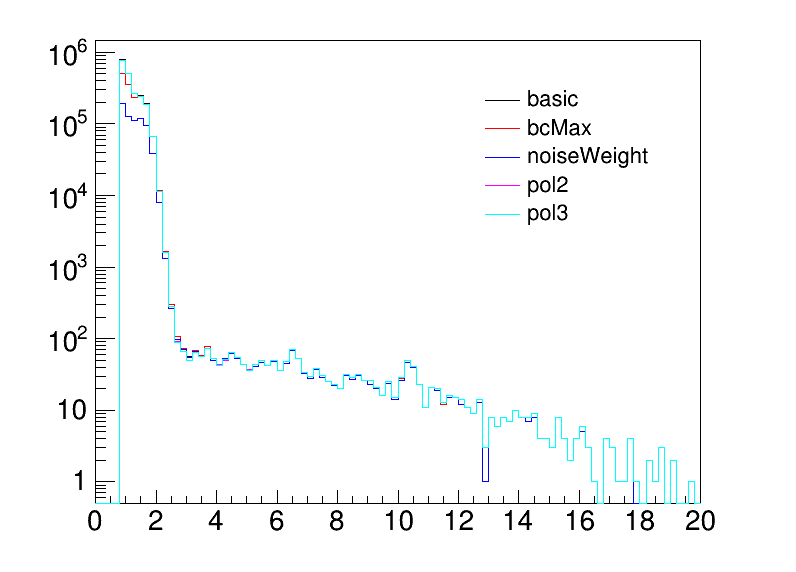

In [4]:
ds = 3
f1 = ROOT.TFile("~/project/lat/latSkimDS%d_0_0.root"%ds)
theCut = f1.Get("theCut").GetTitle()

bkg = ROOT.TChain("skimTree")
bkg.Add("~/project/lat/latSkimDS%d*.root"%ds)

c = ROOT.TCanvas("c","c",800,600)
ROOT.gPad.SetLogy(1)
bins,lower,upper = 100,0,20

# raw
h0 = H1D(bkg,"h0",bins,lower,upper,"trapENFCal",theCut)
h0cts = h0.Integral()

# bcMax
thisCut = theCut + " && bcMax < %d" % dsBcMax[ds]
h1 = H1D(bkg,"h1",bins,lower,upper,"trapENFCal",thisCut)
h1cts = h1.Integral()

# noiseWeight
thisCut = theCut + " && (waveS4-waveS1)/bcMax/trapENFCal > %.2f && (waveS4-waveS1)/bcMax/trapENFCal < %.2f" % (dsNoiseWt[ds][0],dsNoiseWt[ds][1])
h2 = H1D(bkg,"h2",bins,lower,upper,"trapENFCal",thisCut)
h2cts = h2.Integral()

# pol2
thisCut = theCut + " && pol2 > %.3e && pol2 < %.3e" % (dsPol2[ds][0],dsPol2[ds][1])
h3 = H1D(bkg,"h3",bins,lower,upper,"trapENFCal",thisCut)
h3cts = h3.Integral()

# pol3
thisCut = theCut + " && pol3 > %.3e && pol3 < %.3e" % (dsPol3[ds][0],dsPol3[ds][1])
h4 = H1D(bkg,"h4",bins,lower,upper,"trapENFCal",thisCut)
h4cts = h4.Integral()

print "raw %d  bcMax %d (%.2f)  noiseWeight %d (%.2f)  pol2 %d (%.2f)  pol3 %d (%.2f)" % (h0cts,h1cts,h1cts/h0cts,h2cts,h2cts/h0cts,h3cts,h3cts/h0cts,h4cts,h4cts/h0cts)


# -- Plot --
h0.SetLineColor(ROOT.kBlack)
h1.SetLineColor(ROOT.kRed)
h2.SetLineColor(ROOT.kBlue)
h3.SetLineColor(ROOT.kMagenta)
h4.SetLineColor(ROOT.kCyan)

h0.Draw("hist")
h1.Draw("hist same")
h2.Draw("hist same")
h3.Draw("hist same")
h4.Draw("hist same")

l1 = ROOT.TLegend(0.6,0.6,0.85,0.85)
l1.AddEntry(h0,"basic","l")
l1.AddEntry(h1,"bcMax","l")
l1.AddEntry(h2,"noiseWeight","l")
l1.AddEntry(h3,"pol2","l")
l1.AddEntry(h4,"pol3","l")
l1.Draw("same")

c.Draw()

raw 753553  bcMax 695941 (0.92)  noiseWeight 149562 (0.20)  pol2 654206 (0.87)  pol3 652343 (0.87)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


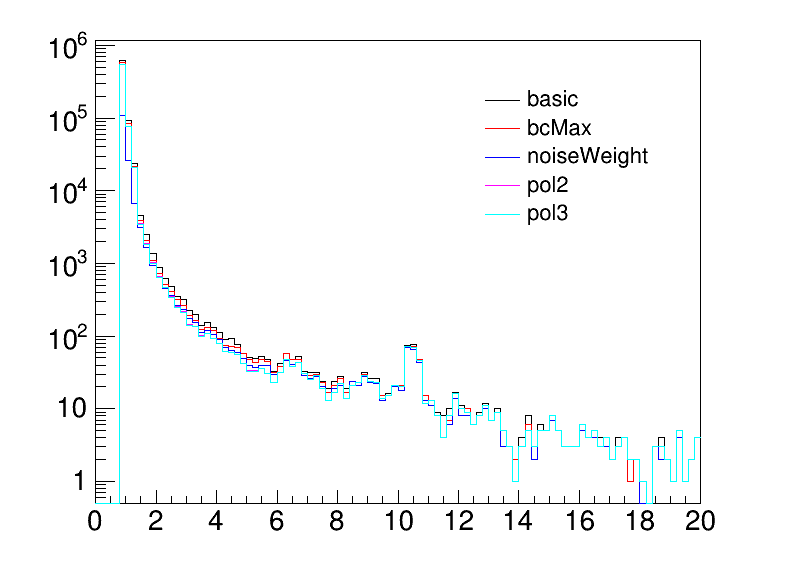

In [5]:
ds = 4
f1 = ROOT.TFile("~/project/lat/latSkimDS%d_0_0.root"%ds)
theCut = f1.Get("theCut").GetTitle()

bkg = ROOT.TChain("skimTree")
bkg.Add("~/project/lat/latSkimDS%d*.root"%ds)

c = ROOT.TCanvas("c","c",800,600)
ROOT.gPad.SetLogy(1)
bins,lower,upper = 100,0,20

# raw
h0 = H1D(bkg,"h0",bins,lower,upper,"trapENFCal",theCut)
h0cts = h0.Integral()

# bcMax
thisCut = theCut + " && bcMax < %d" % dsBcMax[ds]
h1 = H1D(bkg,"h1",bins,lower,upper,"trapENFCal",thisCut)
h1cts = h1.Integral()

# noiseWeight
thisCut = theCut + " && (waveS4-waveS1)/bcMax/trapENFCal > %.2f && (waveS4-waveS1)/bcMax/trapENFCal < %.2f" % (dsNoiseWt[ds][0],dsNoiseWt[ds][1])
h2 = H1D(bkg,"h2",bins,lower,upper,"trapENFCal",thisCut)
h2cts = h2.Integral()

# pol2
thisCut = theCut + " && pol2 > %.3e && pol2 < %.3e" % (dsPol2[ds][0],dsPol2[ds][1])
h3 = H1D(bkg,"h3",bins,lower,upper,"trapENFCal",thisCut)
h3cts = h3.Integral()

# pol3
thisCut = theCut + " && pol3 > %.3e && pol3 < %.3e" % (dsPol3[ds][0],dsPol3[ds][1])
h4 = H1D(bkg,"h4",bins,lower,upper,"trapENFCal",thisCut)
h4cts = h4.Integral()

print "raw %d  bcMax %d (%.2f)  noiseWeight %d (%.2f)  pol2 %d (%.2f)  pol3 %d (%.2f)" % (h0cts,h1cts,h1cts/h0cts,h2cts,h2cts/h0cts,h3cts,h3cts/h0cts,h4cts,h4cts/h0cts)


# -- Plot --
h0.SetLineColor(ROOT.kBlack)
h1.SetLineColor(ROOT.kRed)
h2.SetLineColor(ROOT.kBlue)
h3.SetLineColor(ROOT.kMagenta)
h4.SetLineColor(ROOT.kCyan)

h0.Draw("hist")
h1.Draw("hist same")
h2.Draw("hist same")
h3.Draw("hist same")
h4.Draw("hist same")

l1 = ROOT.TLegend(0.6,0.6,0.85,0.85)
l1.AddEntry(h0,"basic","l")
l1.AddEntry(h1,"bcMax","l")
l1.AddEntry(h2,"noiseWeight","l")
l1.AddEntry(h3,"pol2","l")
l1.AddEntry(h4,"pol3","l")
l1.Draw("same")

c.Draw()

raw 42408424  bcMax 27547135 (0.65)  noiseWeight 7204942 (0.17)  pol2 41390014 (0.98)  pol3 41120985 (0.97)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Init>: file /Users/wisecg/project/lat/latSkimDS5_50_20.root probably not closed, trying to recover
Info in <TFile::Recover>: /Users/wisecg/project/lat/latSkimDS5_50_20.root, recovered key TNamed:theCut at address 61328674
Info in <TFile::Recover>: /Users/wisecg/project/lat/latSkimDS5_50_20.root, recovered key TTree:skimTree at address 74768243
Warning in <TFile::Init>: successfully recovered 2 keys
Warning in <TFile::Init>: no StreamerInfo found in /Users/wisecg/project/lat/latSkimDS5_50_20.root therefore preventing schema evolution when reading this file.
Warning in <TFile::Init>: file /Users/wisecg/project/lat/latSkimDS5_50_20.root probably not closed, trying to recover
Info in <TFile::Recover>: /Users/wisecg/project/lat/latSkimDS5_50_20.root, recovered key TNamed:theCut at address 61328674
Info in <TFile::Recover>: /Users/wisecg/project/lat/latSkimDS5_50_20.root, recovered key TTree:skimTree at a

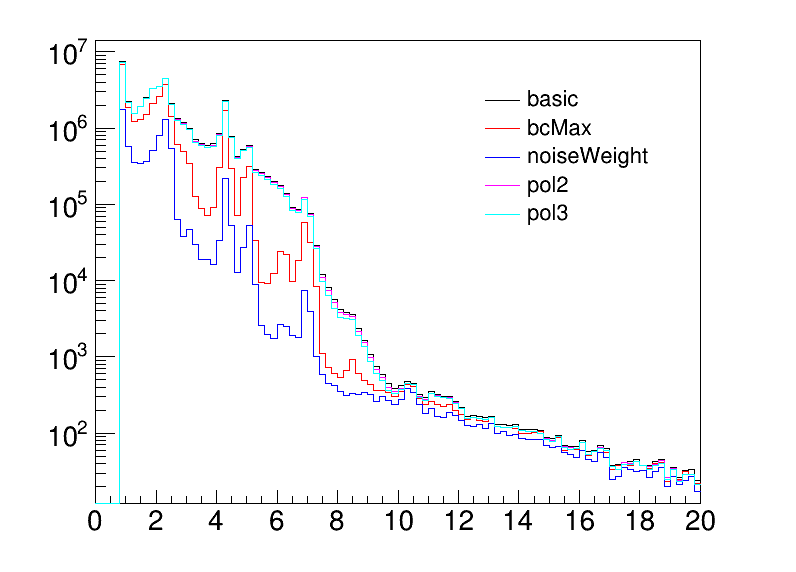

In [6]:
ds = 5
f1 = ROOT.TFile("~/project/lat/latSkimDS%d_0_0.root"%ds)
theCut = f1.Get("theCut").GetTitle()

bkg = ROOT.TChain("skimTree")
bkg.Add("~/project/lat/latSkimDS%d*.root"%ds)

c = ROOT.TCanvas("c","c",800,600)
ROOT.gPad.SetLogy(1)
bins,lower,upper = 100,0,20

# raw
h0 = H1D(bkg,"h0",bins,lower,upper,"trapENFCal",theCut)
h0cts = h0.Integral()

# bcMax
thisCut = theCut + " && bcMax < %d" % dsBcMax[ds]
h1 = H1D(bkg,"h1",bins,lower,upper,"trapENFCal",thisCut)
h1cts = h1.Integral()

# noiseWeight
thisCut = theCut + " && (waveS4-waveS1)/bcMax/trapENFCal > %.2f && (waveS4-waveS1)/bcMax/trapENFCal < %.2f" % (dsNoiseWt[ds][0],dsNoiseWt[ds][1])
h2 = H1D(bkg,"h2",bins,lower,upper,"trapENFCal",thisCut)
h2cts = h2.Integral()

# pol2
thisCut = theCut + " && pol2 > %.3e && pol2 < %.3e" % (dsPol2[ds][0],dsPol2[ds][1])
h3 = H1D(bkg,"h3",bins,lower,upper,"trapENFCal",thisCut)
h3cts = h3.Integral()

# pol3
thisCut = theCut + " && pol3 > %.3e && pol3 < %.3e" % (dsPol3[ds][0],dsPol3[ds][1])
h4 = H1D(bkg,"h4",bins,lower,upper,"trapENFCal",thisCut)
h4cts = h4.Integral()

print "raw %d  bcMax %d (%.2f)  noiseWeight %d (%.2f)  pol2 %d (%.2f)  pol3 %d (%.2f)" % (h0cts,h1cts,h1cts/h0cts,h2cts,h2cts/h0cts,h3cts,h3cts/h0cts,h4cts,h4cts/h0cts)


# -- Plot --
h0.SetLineColor(ROOT.kBlack)
h1.SetLineColor(ROOT.kRed)
h2.SetLineColor(ROOT.kBlue)
h3.SetLineColor(ROOT.kMagenta)
h4.SetLineColor(ROOT.kCyan)

h0.Draw("hist")
h1.Draw("hist same")
h2.Draw("hist same")
h3.Draw("hist same")
h4.Draw("hist same")

l1 = ROOT.TLegend(0.6,0.6,0.85,0.85)
l1.AddEntry(h0,"basic","l")
l1.AddEntry(h1,"bcMax","l")
l1.AddEntry(h2,"noiseWeight","l")
l1.AddEntry(h3,"pol2","l")
l1.AddEntry(h4,"pol3","l")
l1.Draw("same")

c.Draw()

raw 2305421  +noiseWeight 1713347 (0.74)  +bcMax 1710402 (1.00)  +pol2,pol3 1617529 (0.95)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


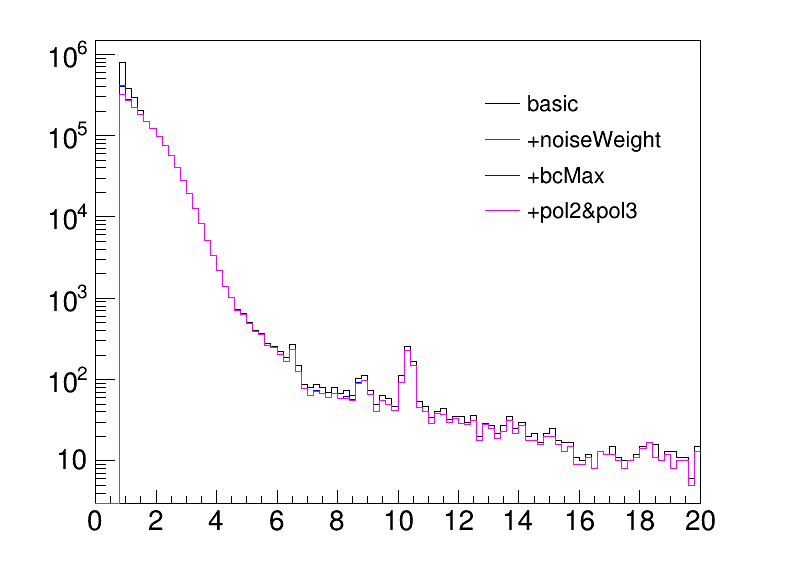

In [16]:
ds = 0
bins,lower,upper = 100,0,20

f1 = ROOT.TFile("~/project/lat/latSkimDS%d_0_0.root"%ds)
theCut = f1.Get("theCut").GetTitle()

bkg = ROOT.TChain("skimTree")
bkg.Add("~/project/lat/latSkimDS%d*.root"%ds)

# raw
h0 = H1D(bkg,"h0",bins,lower,upper,"trapENFCal",theCut)
h0cts = h0.Integral()

# noiseWeight
noiseWtCut = " && (waveS4-waveS1)/bcMax/trapENFCal > %.2f && (waveS4-waveS1)/bcMax/trapENFCal < %.2f" % (dsNoiseWt[ds][0],dsNoiseWt[ds][1])
thisCut = theCut + noiseWtCut
h1 = H1D(bkg,"h1",bins,lower,upper,"trapENFCal",thisCut)
h1cts = h1.Integral()

# bcMax
bcMaxCut = " && bcMax < %d" % dsBcMax[ds]
thisCut = theCut + noiseWtCut + bcMaxCut
h2 = H1D(bkg,"h2",bins,lower,upper,"trapENFCal",thisCut)
h2cts = h2.Integral()

# pol2 + pol3
pol2Cut = " && pol2 > %.3e && pol2 < %.3e" % (dsPol2[ds][0],dsPol2[ds][1])
pol3Cut = " && pol3 > %.3e && pol3 < %.3e" % (dsPol3[ds][0],dsPol3[ds][1])
thisCut = theCut + noiseWtCut + bcMaxCut + pol2Cut + pol3Cut
h3 = H1D(bkg,"h3",bins,lower,upper,"trapENFCal",thisCut)
h3cts = h3.Integral()

print "raw %d  +noiseWeight %d (%.2f)  +bcMax %d (%.2f)  +pol2,pol3 %d (%.2f)" % (h0cts,h1cts,h1cts/h0cts,h2cts,h2cts/h1cts,h3cts,h3cts/h2cts)


# -- Plot --
c = ROOT.TCanvas("c","c",800,600)
ROOT.gPad.SetLogy(1)

h0.SetLineColor(ROOT.kBlack)
h1.SetLineColor(ROOT.kRed)
h2.SetLineColor(ROOT.kBlue)
h3.SetLineColor(ROOT.kMagenta)

h0.Draw("hist")
h1.Draw("hist same")
h2.Draw("hist same")
h3.Draw("hist same")

l1 = ROOT.TLegend(0.6,0.6,0.85,0.85)
l1.AddEntry(h0,"basic","l")
l1.AddEntry(h1,"+noiseWeight","l")
l1.AddEntry(h2,"+bcMax","l")
l1.AddEntry(h3,"+pol2&pol3","l")
l1.Draw("same")

c.Draw()

raw 42039  +noiseWeight 21983 (0.52)  +bcMax 20278 (0.92)  +pol2,pol3 15293 (0.75)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


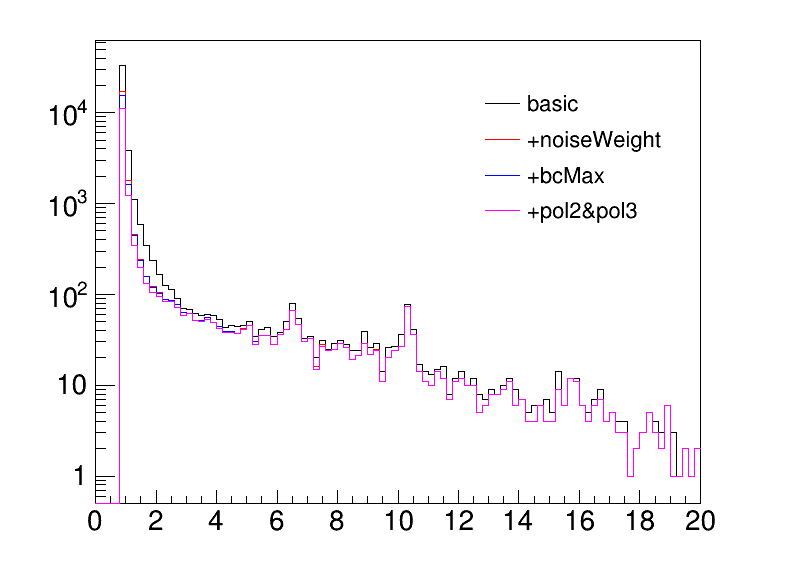

In [17]:
ds = 1
bins,lower,upper = 100,0,20

f1 = ROOT.TFile("~/project/lat/latSkimDS%d_0_0.root"%ds)
theCut = f1.Get("theCut").GetTitle()

bkg = ROOT.TChain("skimTree")
bkg.Add("~/project/lat/latSkimDS%d*.root"%ds)

# raw
h0 = H1D(bkg,"h0",bins,lower,upper,"trapENFCal",theCut)
h0cts = h0.Integral()

# noiseWeight
noiseWtCut = " && (waveS4-waveS1)/bcMax/trapENFCal > %.2f && (waveS4-waveS1)/bcMax/trapENFCal < %.2f" % (dsNoiseWt[ds][0],dsNoiseWt[ds][1])
thisCut = theCut + noiseWtCut
h1 = H1D(bkg,"h1",bins,lower,upper,"trapENFCal",thisCut)
h1cts = h1.Integral()

# bcMax
bcMaxCut = " && bcMax < %d" % dsBcMax[ds]
thisCut = theCut + noiseWtCut + bcMaxCut
h2 = H1D(bkg,"h2",bins,lower,upper,"trapENFCal",thisCut)
h2cts = h2.Integral()

# pol2 + pol3
pol2Cut = " && pol2 > %.3e && pol2 < %.3e" % (dsPol2[ds][0],dsPol2[ds][1])
pol3Cut = " && pol3 > %.3e && pol3 < %.3e" % (dsPol3[ds][0],dsPol3[ds][1])
thisCut = theCut + noiseWtCut + bcMaxCut + pol2Cut + pol3Cut
h3 = H1D(bkg,"h3",bins,lower,upper,"trapENFCal",thisCut)
h3cts = h3.Integral()

print "raw %d  +noiseWeight %d (%.2f)  +bcMax %d (%.2f)  +pol2,pol3 %d (%.2f)" % (h0cts,h1cts,h1cts/h0cts,h2cts,h2cts/h1cts,h3cts,h3cts/h2cts)


# -- Plot --
c = ROOT.TCanvas("c","c",800,600)
ROOT.gPad.SetLogy(1)

h0.SetLineColor(ROOT.kBlack)
h1.SetLineColor(ROOT.kRed)
h2.SetLineColor(ROOT.kBlue)
h3.SetLineColor(ROOT.kMagenta)

h0.Draw("hist")
h1.Draw("hist same")
h2.Draw("hist same")
h3.Draw("hist same")

l1 = ROOT.TLegend(0.6,0.6,0.85,0.85)
l1.AddEntry(h0,"basic","l")
l1.AddEntry(h1,"+noiseWeight","l")
l1.AddEntry(h2,"+bcMax","l")
l1.AddEntry(h3,"+pol2&pol3","l")
l1.Draw("same")

c.Draw()

raw 2081200  +noiseWeight 692444 (0.33)  +bcMax 682456 (0.99)  +pol2,pol3 673179 (0.99)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


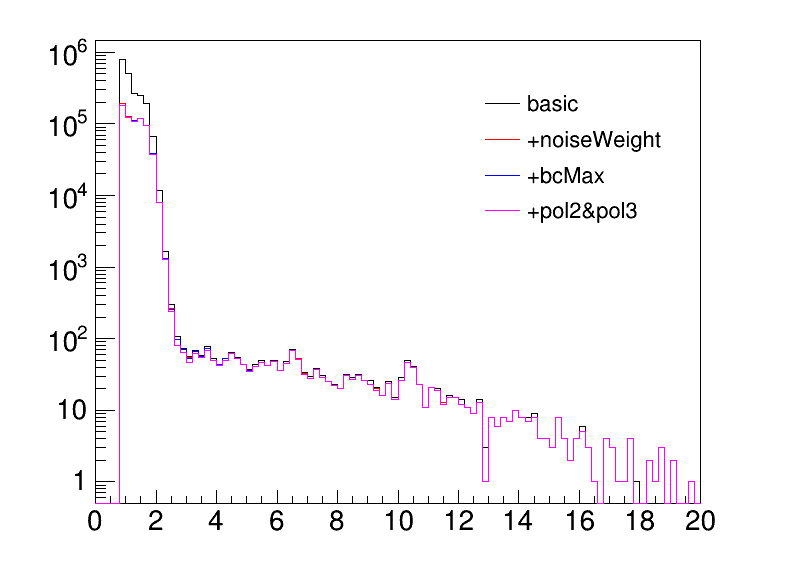

In [18]:
ds = 3
bins,lower,upper = 100,0,20

f1 = ROOT.TFile("~/project/lat/latSkimDS%d_0_0.root"%ds)
theCut = f1.Get("theCut").GetTitle()

bkg = ROOT.TChain("skimTree")
bkg.Add("~/project/lat/latSkimDS%d*.root"%ds)

# raw
h0 = H1D(bkg,"h0",bins,lower,upper,"trapENFCal",theCut)
h0cts = h0.Integral()

# noiseWeight
noiseWtCut = " && (waveS4-waveS1)/bcMax/trapENFCal > %.2f && (waveS4-waveS1)/bcMax/trapENFCal < %.2f" % (dsNoiseWt[ds][0],dsNoiseWt[ds][1])
thisCut = theCut + noiseWtCut
h1 = H1D(bkg,"h1",bins,lower,upper,"trapENFCal",thisCut)
h1cts = h1.Integral()

# bcMax
bcMaxCut = " && bcMax < %d" % dsBcMax[ds]
thisCut = theCut + noiseWtCut + bcMaxCut
h2 = H1D(bkg,"h2",bins,lower,upper,"trapENFCal",thisCut)
h2cts = h2.Integral()

# pol2 + pol3
pol2Cut = " && pol2 > %.3e && pol2 < %.3e" % (dsPol2[ds][0],dsPol2[ds][1])
pol3Cut = " && pol3 > %.3e && pol3 < %.3e" % (dsPol3[ds][0],dsPol3[ds][1])
thisCut = theCut + noiseWtCut + bcMaxCut + pol2Cut + pol3Cut
h3 = H1D(bkg,"h3",bins,lower,upper,"trapENFCal",thisCut)
h3cts = h3.Integral()

print "raw %d  +noiseWeight %d (%.2f)  +bcMax %d (%.2f)  +pol2,pol3 %d (%.2f)" % (h0cts,h1cts,h1cts/h0cts,h2cts,h2cts/h1cts,h3cts,h3cts/h2cts)


# -- Plot --
c = ROOT.TCanvas("c","c",800,600)
ROOT.gPad.SetLogy(1)

h0.SetLineColor(ROOT.kBlack)
h1.SetLineColor(ROOT.kRed)
h2.SetLineColor(ROOT.kBlue)
h3.SetLineColor(ROOT.kMagenta)

h0.Draw("hist")
h1.Draw("hist same")
h2.Draw("hist same")
h3.Draw("hist same")

l1 = ROOT.TLegend(0.6,0.6,0.85,0.85)
l1.AddEntry(h0,"basic","l")
l1.AddEntry(h1,"+noiseWeight","l")
l1.AddEntry(h2,"+bcMax","l")
l1.AddEntry(h3,"+pol2&pol3","l")
l1.Draw("same")

c.Draw()

raw 753553  +noiseWeight 149562 (0.20)  +bcMax 143243 (0.96)  +pol2,pol3 106446 (0.74)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


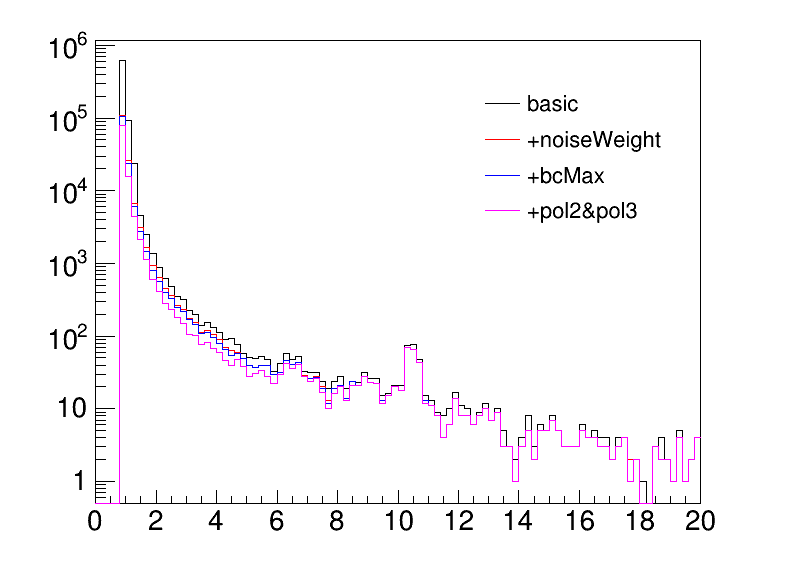

In [19]:
ds = 4
bins,lower,upper = 100,0,20

f1 = ROOT.TFile("~/project/lat/latSkimDS%d_0_0.root"%ds)
theCut = f1.Get("theCut").GetTitle()

bkg = ROOT.TChain("skimTree")
bkg.Add("~/project/lat/latSkimDS%d*.root"%ds)

# raw
h0 = H1D(bkg,"h0",bins,lower,upper,"trapENFCal",theCut)
h0cts = h0.Integral()

# noiseWeight
noiseWtCut = " && (waveS4-waveS1)/bcMax/trapENFCal > %.2f && (waveS4-waveS1)/bcMax/trapENFCal < %.2f" % (dsNoiseWt[ds][0],dsNoiseWt[ds][1])
thisCut = theCut + noiseWtCut
h1 = H1D(bkg,"h1",bins,lower,upper,"trapENFCal",thisCut)
h1cts = h1.Integral()

# bcMax
bcMaxCut = " && bcMax < %d" % dsBcMax[ds]
thisCut = theCut + noiseWtCut + bcMaxCut
h2 = H1D(bkg,"h2",bins,lower,upper,"trapENFCal",thisCut)
h2cts = h2.Integral()

# pol2 + pol3
pol2Cut = " && pol2 > %.3e && pol2 < %.3e" % (dsPol2[ds][0],dsPol2[ds][1])
pol3Cut = " && pol3 > %.3e && pol3 < %.3e" % (dsPol3[ds][0],dsPol3[ds][1])
thisCut = theCut + noiseWtCut + bcMaxCut + pol2Cut + pol3Cut
h3 = H1D(bkg,"h3",bins,lower,upper,"trapENFCal",thisCut)
h3cts = h3.Integral()

print "raw %d  +noiseWeight %d (%.2f)  +bcMax %d (%.2f)  +pol2,pol3 %d (%.2f)" % (h0cts,h1cts,h1cts/h0cts,h2cts,h2cts/h1cts,h3cts,h3cts/h2cts)


# -- Plot --
c = ROOT.TCanvas("c","c",800,600)
ROOT.gPad.SetLogy(1)

h0.SetLineColor(ROOT.kBlack)
h1.SetLineColor(ROOT.kRed)
h2.SetLineColor(ROOT.kBlue)
h3.SetLineColor(ROOT.kMagenta)

h0.Draw("hist")
h1.Draw("hist same")
h2.Draw("hist same")
h3.Draw("hist same")

l1 = ROOT.TLegend(0.6,0.6,0.85,0.85)
l1.AddEntry(h0,"basic","l")
l1.AddEntry(h1,"+noiseWeight","l")
l1.AddEntry(h2,"+bcMax","l")
l1.AddEntry(h3,"+pol2&pol3","l")
l1.Draw("same")

c.Draw()

raw 42408424  +noiseWeight 7204942 (0.17)  +bcMax 7058432 (0.98)  +pol2,pol3 6724559 (0.95)


Warning in <TFile::Init>: file /Users/wisecg/project/lat/latSkimDS5_50_20.root probably not closed, trying to recover
Info in <TFile::Recover>: /Users/wisecg/project/lat/latSkimDS5_50_20.root, recovered key TNamed:theCut at address 61328674
Info in <TFile::Recover>: /Users/wisecg/project/lat/latSkimDS5_50_20.root, recovered key TTree:skimTree at address 74768243
Warning in <TFile::Init>: successfully recovered 2 keys
Warning in <TFile::Init>: no StreamerInfo found in /Users/wisecg/project/lat/latSkimDS5_50_20.root therefore preventing schema evolution when reading this file.
Warning in <TFile::Init>: file /Users/wisecg/project/lat/latSkimDS5_50_20.root probably not closed, trying to recover
Info in <TFile::Recover>: /Users/wisecg/project/lat/latSkimDS5_50_20.root, recovered key TNamed:theCut at address 61328674
Info in <TFile::Recover>: /Users/wisecg/project/lat/latSkimDS5_50_20.root, recovered key TTree:skimTree at address 74768243
Warning in <TFile::Init>: successfully recovered 2 ke

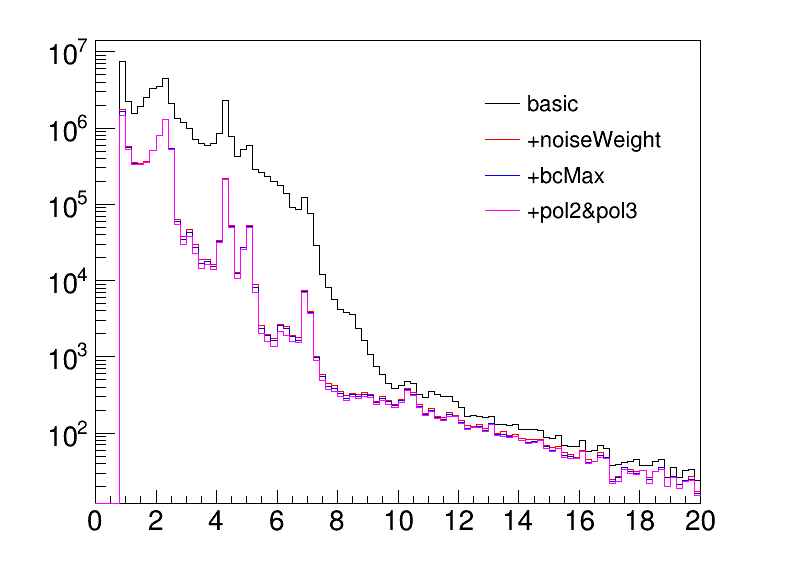

In [20]:
ds = 5
bins,lower,upper = 100,0,20

f1 = ROOT.TFile("~/project/lat/latSkimDS%d_0_0.root"%ds)
theCut = f1.Get("theCut").GetTitle()

bkg = ROOT.TChain("skimTree")
bkg.Add("~/project/lat/latSkimDS%d*.root"%ds)

# raw
h0 = H1D(bkg,"h0",bins,lower,upper,"trapENFCal",theCut)
h0cts = h0.Integral()

# noiseWeight
noiseWtCut = " && (waveS4-waveS1)/bcMax/trapENFCal > %.2f && (waveS4-waveS1)/bcMax/trapENFCal < %.2f" % (dsNoiseWt[ds][0],dsNoiseWt[ds][1])
thisCut = theCut + noiseWtCut
h1 = H1D(bkg,"h1",bins,lower,upper,"trapENFCal",thisCut)
h1cts = h1.Integral()

# bcMax
bcMaxCut = " && bcMax < %d" % dsBcMax[ds]
thisCut = theCut + noiseWtCut + bcMaxCut
h2 = H1D(bkg,"h2",bins,lower,upper,"trapENFCal",thisCut)
h2cts = h2.Integral()

# pol2 + pol3
pol2Cut = " && pol2 > %.3e && pol2 < %.3e" % (dsPol2[ds][0],dsPol2[ds][1])
pol3Cut = " && pol3 > %.3e && pol3 < %.3e" % (dsPol3[ds][0],dsPol3[ds][1])
thisCut = theCut + noiseWtCut + bcMaxCut + pol2Cut + pol3Cut
h3 = H1D(bkg,"h3",bins,lower,upper,"trapENFCal",thisCut)
h3cts = h3.Integral()

print "raw %d  +noiseWeight %d (%.2f)  +bcMax %d (%.2f)  +pol2,pol3 %d (%.2f)" % (h0cts,h1cts,h1cts/h0cts,h2cts,h2cts/h1cts,h3cts,h3cts/h2cts)


# -- Plot --
c = ROOT.TCanvas("c","c",800,600)
ROOT.gPad.SetLogy(1)

h0.SetLineColor(ROOT.kBlack)
h1.SetLineColor(ROOT.kRed)
h2.SetLineColor(ROOT.kBlue)
h3.SetLineColor(ROOT.kMagenta)

h0.Draw("hist")
h1.Draw("hist same")
h2.Draw("hist same")
h3.Draw("hist same")

l1 = ROOT.TLegend(0.6,0.6,0.85,0.85)
l1.AddEntry(h0,"basic","l")
l1.AddEntry(h1,"+noiseWeight","l")
l1.AddEntry(h2,"+bcMax","l")
l1.AddEntry(h3,"+pol2&pol3","l")
l1.Draw("same")

c.Draw()